In [31]:
library(Seurat)
#InstallData("stxBrain")
library(SeuratData)
library(stringr)

Input files are stored in the file `input_data`.

In [32]:
input_data <- "~/Celloscope/example/data/"

### Loading matrix B (prior knowledge about marker genes)

In [33]:
address_matB <- "~/Celloscope/example/data/matB.csv" 
matB <- read.csv(address_matB, row.names=1)
matB[1:5,]

,ASC,CPC,GABA,GLUT,OLG,DT
,<int>,<int>,<int>,<int>,<int>,<int>
Slc1a3,1,0,0,0,0,0
Gja1,1,0,0,0,0,0
Atp1a2,1,0,0,0,0,0
Atp1b2,1,0,0,0,0,0
Bcan,1,0,0,0,0,0


### Loading ST gene expression data

Here we will use data from `SeuratData` package

In [34]:
brain <- LoadData("stxBrain", type = "anterior1")
ST <- brain@assays$Spatial@data

ST <- as.matrix(ST)
ST[1:5,1:5]

,AAACAAGTATCTCCCA-1,AAACACCAATAACTGC-1,AAACAGAGCGACTCCT-1,AAACAGCTTTCAGAAG-1,AAACAGGGTCTATATT-1
Xkr4,0,0,0,0,0
Gm1992,0,0,0,0,0
Gm37381,0,0,0,0,0
Rp1,0,0,0,0,0
Sox17,0,1,0,0,0


### Extracting coordinates

In [35]:
head(brain@images$anterior1@coordinates)

,tissue,row,col,imagerow,imagecol
,<int>,<int>,<int>,<int>,<int>
AAACAAGTATCTCCCA-1,1,50,102,7475,8501
AAACACCAATAACTGC-1,1,59,19,8553,2788
AAACAGAGCGACTCCT-1,1,14,94,3164,7950
AAACAGCTTTCAGAAG-1,1,43,9,6637,2099
AAACAGGGTCTATATT-1,1,47,13,7116,2375
AAACATGGTGAGAGGA-1,1,62,0,8913,1480


In [36]:
cor <- brain@images$anterior1@coordinates

In [37]:
x <- cor$row

In [38]:
y <- cor$col

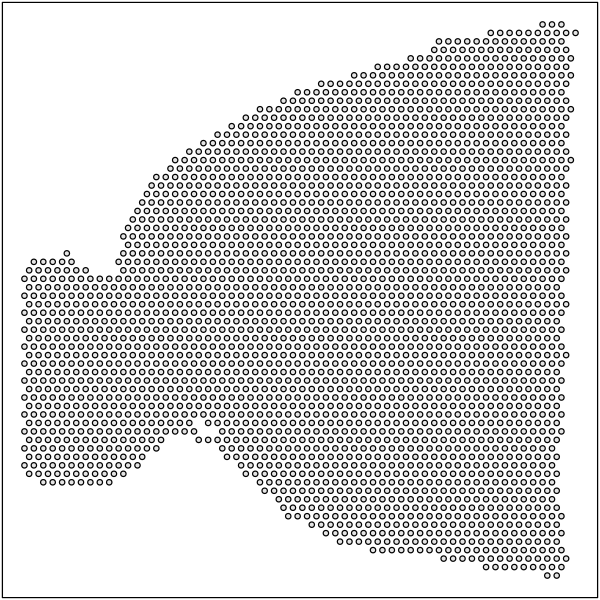

In [39]:
#Visualizing spots taken on the tissue
options(repr.plot.width = 5, repr.plot.height = 5)
par(mgp=c(0, 0,0),mar=c(0,0,0,0)+0.1)
plot(y,-x, xlab="", ylab="",  pch=21, col="black", bg="gray90", xaxt="n", yaxt="n", ann = FALSE,  cex=0.6) 

### Naming ST matrix columns with spot IDs

In [40]:
spots <- paste0(x, "x", y)
colnames(ST) <- spots
ST[1:5,1:5]

,50x102,59x19,14x94,43x9,47x13
Xkr4,0,0,0,0,0
Gm1992,0,0,0,0,0
Gm37381,0,0,0,0,0
Rp1,0,0,0,0,0
Sox17,0,1,0,0,0


### Limitting ST matrix to marker genes

In [41]:
ST_marker_genes <- ST[rownames(matB), ]
ST_marker_genes[1:5,1:5]

,50x102,59x19,14x94,43x9,47x13
Slc1a3,2,19,6,12,22
Gja1,2,11,1,2,3
Atp1a2,11,29,12,8,9
Atp1b2,5,15,2,4,11
Bcan,5,10,4,12,5


<span style="color:red">**IMPORTANT: genes (rows) in matrix ST must be in the same order as genes (rows) in matB.** </span>

In [42]:
all(rownames(ST_marker_genes)==rownames(matB))

[1] TRUE

### Choosing an arbitrary subset of spots (optionally)

In [43]:
df <- data.frame(x=x, y=y)
chosen <- df[ (df$y<102) & (df$y > 70), ]
chosen <- chosen[ (chosen$x>20) & (chosen$x < 50)    ,]

#### Visualizing spots taken on the tissue and the chosen subset

In [48]:
chosen_x <- chosen$x

In [49]:
chosen_y <- chosen$y

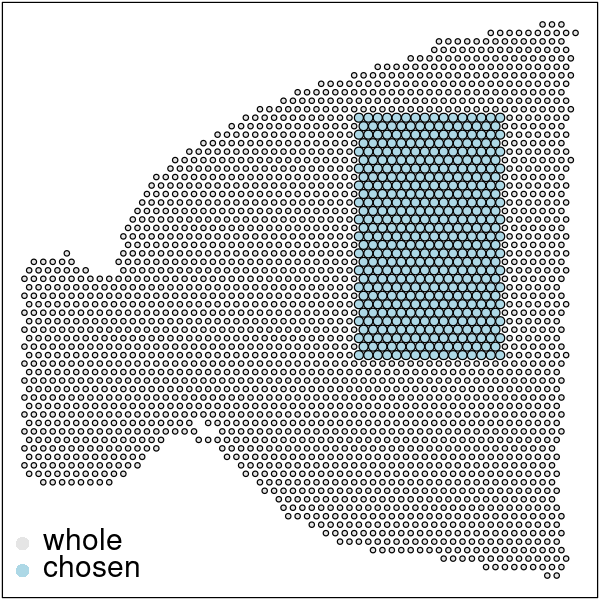

In [50]:
options(repr.plot.width = 5, repr.plot.height = 5)
par(mgp=c(0, 0,0),mar=c(0,0,0,0)+0.1)
plot(y,-x, xlab="", ylab="",  pch=21, col="black", bg="gray90", xaxt="n", yaxt="n", ann = FALSE,  cex=0.6)
points(chosen_y, -chosen_x, pch=21, col="black", bg="lightblue")
legend("bottomleft", legend=c("whole", "chosen"), pch=16, col=c("gray90", "lightblue" ), cex=1.5, bty="n")

### Subsetting ST data to the chosen subset of spots

In [51]:
coord <- paste0(chosen$x, "x", chosen$y)
ST_subset <- ST_marker_genes[,colnames(ST_marker_genes) %in% coord]
ST_subset[1:5, 1:5]

,35x79,44x94,42x96,26x94,27x99
Slc1a3,7,5,7,3,1
Gja1,0,2,4,1,0
Atp1a2,14,7,9,1,3
Atp1b2,4,3,4,2,3
Bcan,3,3,1,5,3


### Saving ST matrix to `.csv` file

In [52]:
write.csv(as.matrix(ST_subset), paste0(input_data, "C_gs.csv"))

### Estimates for the number of all cells

In [53]:
address_n_cells <- "~/Celloscope/example/data/cell-counts.csv"
cellCounts <- read.csv(address_n_cells, header = TRUE, stringsAsFactors = FALSE)
head(cellCounts)

,spotId,cellCount
,<chr>,<int>
1,50x102,12
2,59x19,13
3,14x94,8
4,43x9,12
5,47x13,19
6,62x0,3


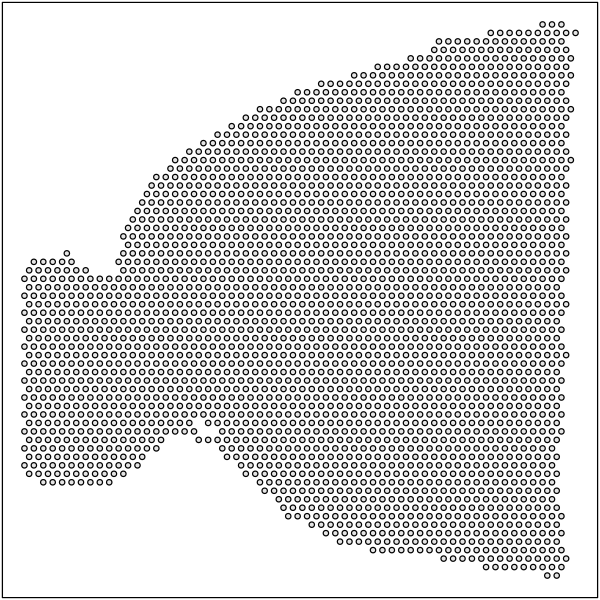

In [55]:
xy <- str_extract_all(cellCounts$spotId, "[0-9]+")
lista <- lapply(xy, as.numeric)
x <- as.numeric(sapply(lista, function(z) z[[1]]))
y <- as.numeric(sapply(lista, function(z) z[[2]]))
par(mgp=c(0, 0,0),mar=c(0,0,0,0)+0.1)
plot(y,-x, xlab="", ylab="",  pch=21, col="black", bg="gray90", xaxt="n", yaxt="n", ann = FALSE,  cex=0.6)

### Subsetting cellCounts to subset of spots

In [56]:
n_cells <- cellCounts[cellCounts$spotId %in% coord, ]
n_cells <- n_cells[match(coord,  n_cells$"spotId"), ]
head(n_cells)

,spotId,cellCount
,<chr>,<int>
12,35x79,13
24,44x94,12
25,42x96,13
39,26x94,11
46,27x99,16
50,40x96,15


<span style="color:red">**Important: spots (rows) in n_cells shound be in the same order as spots (columns) in ST (C_gs) gene expression matrix.** </span>


In [58]:
all(n_cells$"spotId" == colnames(ST_subset))

[1] TRUE

### Saving cell counts to `.csv` file

In [59]:
write.csv(n_cells, paste0(input_data, "n_cells.csv"))